<h1>Apple Stock Analysis and Trading Test</h1>

In [1]:
import quandl
import pandas as pd
import pandas_datareader as pdr
import statsmodels.api as sm
import numpy as np
import datetime

aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")

In [2]:
# Return first rows of `aapl`
aapl.head()

# Return last rows of `aapl`
aapl.tail()

# Describe `aapl`
aapl.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03,1323.0,1323.0,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03
mean,202.303670,204.674047,199.552209,202.224393,2.689852e+07,0.0,1.0,25.998841,26.303468,25.645240,25.988653,1.882896e+08
std,98.862163,99.387200,98.208529,98.837774,1.467152e+07,0.0,0.0,12.705166,12.772640,12.621165,12.702032,1.027007e+08
min,73.420000,73.980000,72.600000,73.230000,5.624800e+06,0.0,1.0,9.435493,9.507461,9.330112,9.411076,3.937360e+07
25%,122.205000,124.270000,120.275000,122.020000,1.602910e+07,0.0,1.0,15.705046,15.970427,15.457014,15.681271,1.122037e+08
50%,176.260000,179.500000,173.080000,175.840000,2.328380e+07,0.0,1.0,22.651867,23.068252,22.243192,22.597891,1.629866e+08
75%,271.440000,273.927500,268.460000,270.900000,3.308900e+07,0.0,1.0,34.883823,35.203502,34.500852,34.814426,2.316230e+08
max,421.760000,426.700000,415.990000,422.240000,1.204632e+08,0.0,1.0,54.202038,54.836897,53.460513,54.263725,8.432424e+08


<p>The open column describes the opening price of the stock, the low column is the closing price, high and low describe the highest and lowest values of the stock in a given day. Volume describes how much of stock was traded in a day.</p>

In [3]:
# Inspect the index 
aapl.index

# Inspect the columns
aapl.columns

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]

# Check the type of `ts` 
type(ts)

pandas.core.series.Series

In [4]:
# Inspect the first rows of November-December 2006
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

# Inspect the first rows of 2007 
print(aapl.loc['2007'].head())

# Inspect November 2006
print(aapl.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl.iloc[[22,43], [0, 3]])

              Open   High    Low  Close      Volume  Ex-Dividend  Split Ratio  \
Date                                                                            
2006-11-01  81.100  81.38  78.36  79.16  21828300.0          0.0          1.0   
2006-11-02  78.915  79.32  78.50  78.98  16624400.0          0.0          1.0   
2006-11-03  79.360  79.53  77.79  78.29  15424600.0          0.0          1.0   
2006-11-06  78.950  80.06  78.43  79.71  15520600.0          0.0          1.0   
2006-11-07  80.450  81.00  80.13  80.51  18783300.0          0.0          1.0   

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  
Date                                                                  
2006-11-01  10.422480  10.458464  10.070352   10.173163  152798100.0  
2006-11-02  10.141677  10.193726  10.088344   10.150031  116370800.0  
2006-11-03  10.198866  10.220713   9.997099   10.061356  107972200.0  
2006-11-06  10.146175  10.288826  10.079348   10.243846  108644200.0  
2006-1

In [5]:
# Sample 20 rows
sample = aapl.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_aapl = aapl.resample('M').mean()

# Print `monthly_aapl`
print(monthly_aapl)

              Open      High       Low    Close      Volume  Ex-Dividend  \
Date                                                                       
2010-08-24  242.67  243.0000  238.6500  239.930  21520200.0          0.0   
2010-09-01  247.47  251.4600  246.2800  250.330  24894200.0          0.0   
2007-11-14  177.16  177.5700  163.7400  166.110  51756000.0          0.0   
2008-08-27  173.31  175.7600  172.1909  174.670  17063600.0          0.0   
2009-09-15  174.04  175.6500  173.5900  175.160  15231100.0          0.0   
2008-06-10  180.33  186.7800  179.0200  185.640  40747900.0          0.0   
2007-02-05   84.30   85.2300   83.9400   83.940  20673300.0          0.0   
2011-12-08  391.45  395.5000  390.2300  390.660  13441300.0          0.0   
2010-11-26  313.74  317.6999  312.9400  315.000   8485200.0          0.0   
2008-04-21  162.35  168.5000  161.7600  168.160  37112600.0          0.0   
2007-07-03  122.00  127.4000  121.5000  127.170  41517200.0          0.0   
2010-01-27  

In [6]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close

"""
The diff column is used to describe the difference between the opening price and the closing price of the stock. This
indicates if there was a positive or negative trend in a given day for the stock.
"""

# Get first few rows of `aapl` to see new column
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,diff
Date,,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0,0.24
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0,0.38
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0,-1.28
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0,-0.30
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0,0.20


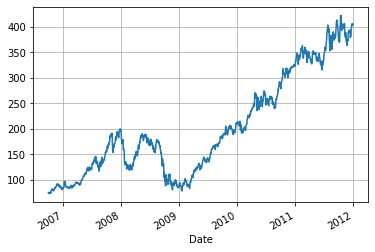

In [7]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True)

# Show the plot
plt.show()

<h2>Common Financial Analysis</h2>

<p>The graphs below showing the comparison between Apple, Google, IBM and Microsoft are from an article that can be found in the GitHub repo research section.</p>

In [8]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj. Close']]

# Daily returns
daily_pct_change = daily_close.pct_change()

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_change)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj. Close
Date                  
2006-10-02    0.000000
2006-10-03   -0.010553
2006-10-04    0.017686
2006-10-05   -0.007296
2006-10-06   -0.008152
...                ...
2011-12-23    0.011993
2011-12-27    0.007934
2011-12-28   -0.009569
2011-12-29    0.006159
2011-12-30   -0.000296

[1323 rows x 1 columns]
            Adj. Close
Date                  
2006-10-02         NaN
2006-10-03   -0.010609
2006-10-04    0.017531
2006-10-05   -0.007323
2006-10-06   -0.008185
...                ...
2011-12-23    0.011922
2011-12-27    0.007903
2011-12-28   -0.009615
2011-12-29    0.006140
2011-12-30   -0.000296

[1323 rows x 1 columns]


In [9]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,diff
Date,,,,,,,,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.125782,0.124336,0.121461,0.122890,0.369611,NaN,0.0,0.125782,0.124336,0.121461,0.122890,0.369611,-1.993873
2007-06-30,0.196028,0.195413,0.198331,0.197710,-0.080296,NaN,0.0,0.196028,0.195413,0.198331,0.197710,-0.080296,-1.196962
2007-10-31,0.400986,0.404614,0.392010,0.400796,0.306882,NaN,0.0,0.400986,0.404614,0.392010,0.400796,0.306882,-0.553090
2008-02-29,0.127085,0.131274,0.117746,0.120394,0.172293,NaN,0.0,0.127085,0.131274,0.117746,0.120394,0.172293,-105.476261
2008-06-30,-0.003844,-0.004781,0.005927,0.003673,-0.209762,NaN,0.0,-0.003844,-0.004781,0.005927,0.003673,-0.209762,-1.276151
2008-10-31,-0.114295,-0.108566,-0.124619,-0.118803,0.133219,NaN,0.0,-0.114295,-0.108566,-0.124619,-0.118803,0.133219,-2.887511
2009-02-28,-0.363319,-0.363614,-0.359304,-0.360865,-0.161601,NaN,0.0,-0.363319,-0.363614,-0.359304,-0.360865,-0.161601,-1.068133
2009-06-30,0.311992,0.304360,0.324701,0.316630,-0.386935,NaN,0.0,0.311992,0.304360,0.324701,0.316630,-0.386935,12.806482


In [10]:
# Daily returns
daily_pct_change = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_change`
print(daily_pct_change)

            Adj. Close
Date                  
2006-10-02         NaN
2006-10-03   -0.010553
2006-10-04    0.017686
2006-10-05   -0.007296
2006-10-06   -0.008152
...                ...
2011-12-23    0.011993
2011-12-27    0.007934
2011-12-28   -0.009569
2011-12-29    0.006159
2011-12-30   -0.000296

[1323 rows x 1 columns]


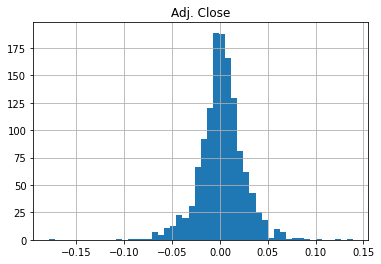

        Adj. Close
count  1322.000000
mean      0.001567
std       0.023994
min      -0.179195
25%      -0.010630
50%       0.001680
75%       0.014306
max       0.139050


In [11]:
# Plot the distribution of `daily_pct_c`
daily_pct_change.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_change.describe())

<p>This histogram shows the distribution of the daily rate of return on the Apple stock. It's a normal distribution which means it is centered around 0% returns which means the stock is generally safe. If the stock is trending heavily upwards then the distrbution would be centered around a positive value and vice verse if it was trending heavily downward. To see that kind of distribution, we would have to change the dates being used for the histogram.</p>

In [12]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_change).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj. Close
Date                  
2006-10-02         NaN
2006-10-03    0.989447
2006-10-04    1.006946
2006-10-05    0.999599
2006-10-06    0.991451
...                ...
2011-12-23    5.387791
2011-12-27    5.430537
2011-12-28    5.378573
2011-12-29    5.411702
2011-12-30    5.410099

[1323 rows x 1 columns]


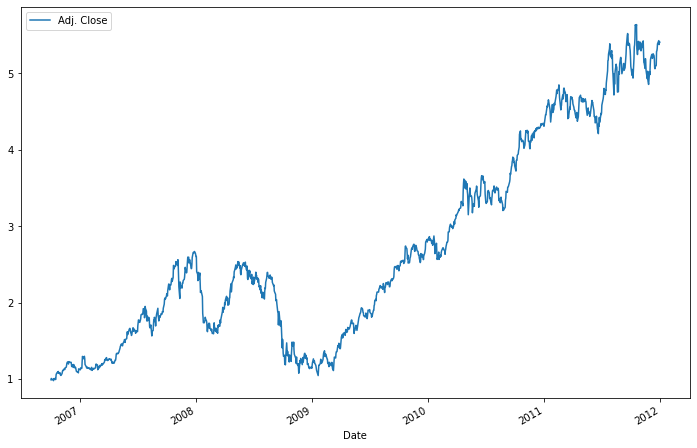

In [13]:
# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

<p>This graph shows the cumulative daily returns of the Apple stock from 2007 to 2012. Cumulative daily return is calculated as the current price of the stock minus the orignal price divided by the original price. This calculatation is useful for showing how much profit or loss is generated by a stock in any given time frame.</p>

In [14]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

            Adj. Close
Date                  
2006-10-31    1.031704
2006-11-30    1.140058
2006-12-31    1.155110
2007-01-31    1.187303
2007-02-28    1.145275
...                ...
2011-08-31    5.032896
2011-09-30    5.243031
2011-10-31    5.306305
2011-11-30    5.140465
2011-12-31    5.248868

[63 rows x 1 columns]


In [15]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))

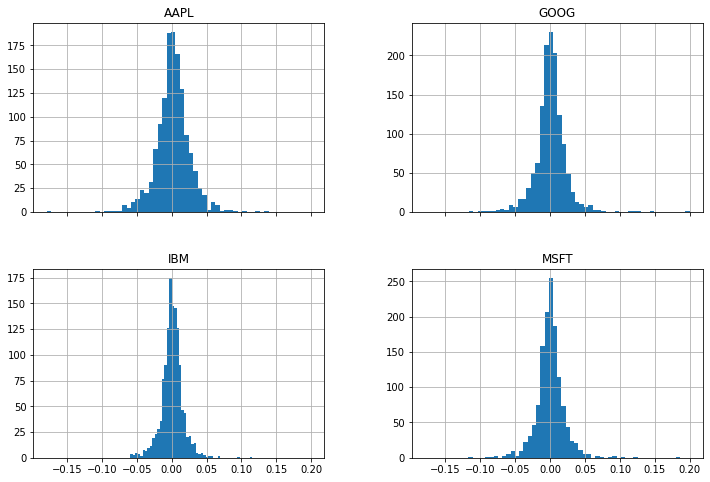

In [16]:
# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

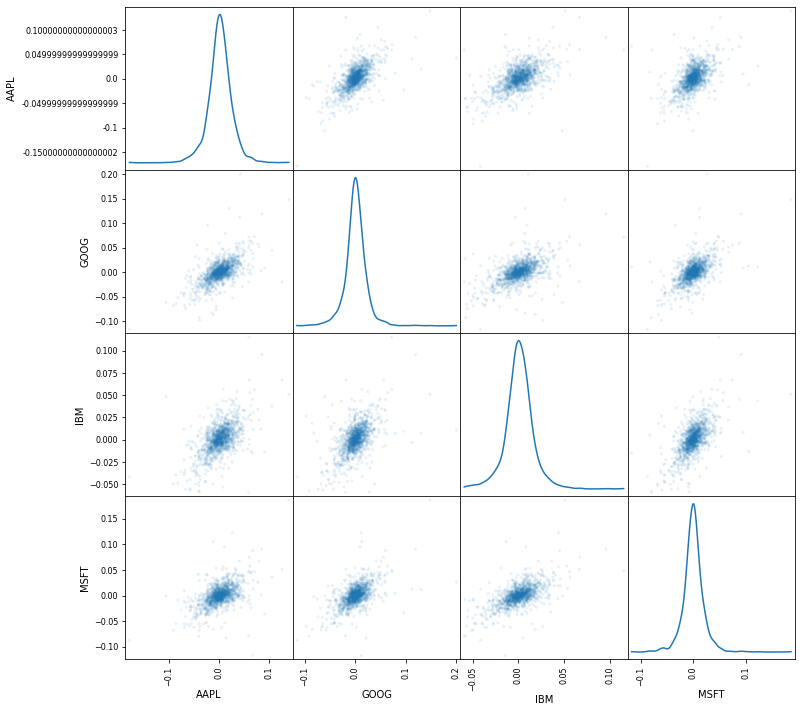

In [17]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

<p>This graph is a scatter matrix plot which shows the daily return distributions of 4 different stocks: Apple, Google, IBM, and Microsoft. We can gain several insights from the scatterplots. All of them tend to show positive linear correlations and this is useful to know because it shows that all the stocks have gone up in value over time when compared to one another. The diaganol show the density of each of the histograms. A density plot tells us where the concentration of the points are and more most of these graphs, they all tend to be in positive regions.</p>

In [18]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj. Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
print(moving_avg[-10:])

Date
2011-12-16    49.954364
2011-12-19    49.920115
2011-12-20    49.888564
2011-12-21    49.884307
2011-12-22    49.877721
2011-12-23    49.873352
2011-12-27    49.878428
2011-12-28    49.871552
2011-12-29    49.899215
2011-12-30    49.923601
Name: Adj. Close, dtype: float64


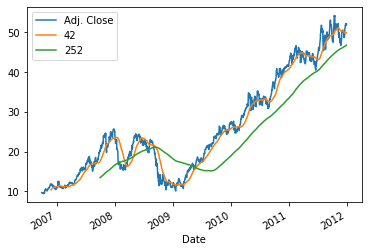

In [19]:
# Short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj. Close', '42', '252']].plot()

# Show plot
plt.show()

<p>This moving window rolling mean plot is the result of using a moving window. Moving windows are when you compute a statistic on a window of data represented by a particular period of time and then slide that window across the data by a specifed interval. In this graph, we calculated the rolling mean of the adjusted closing price of the Apple stock over a 5 year period. The orange line uses shorter 40 day windows while the green line uses 252 day averages (there are 252 trading days in a year so its a year-long window). As you can see, this can show us trend lines of a stock and more importantly the impacts of random, short-term fluctuations on the price of a stock over a specified time-frame are mitigated.</p>

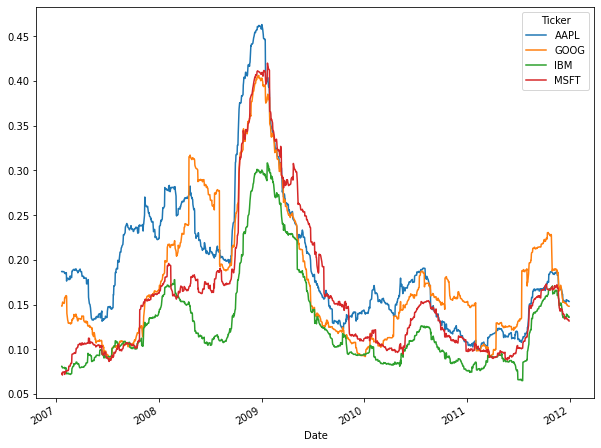

In [20]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [21]:
# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     515.5
Date:                Sat, 15 May 2021   Prob (F-statistic):           1.33e-96
Time:                        17:18:36   Log-Likelihood:                 3514.0
No. Observations:                1322   AIC:                            -7024.
Df Residuals:                    1320   BIC:                            -7014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -1.119      0.2

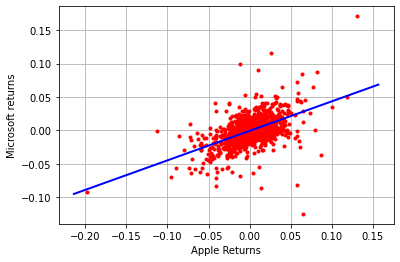

In [22]:
# Plot returns of AAPL and MSFT
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

# Add an axis to the plot
ax = plt.axis()

# Initialize `x`
x = np.linspace(ax[0], ax[1] + 0.01)

# Plot the regression line
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

# Customize the plot
plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

# Show the plot
plt.show()

<p>In the scatterplot above, we compare the returns of Apple versus the returns of Microsoft. Based on the blue regression line, it can be said that Apple's returns show a positive trend when compared with Microsoft's returns. That is, when Microsoft gets more returns Apple also seems to get more returns. This can probably be attributed to the fact that when one tech company does well in the market usually other tech companies will be performing well too.</p>

<h2>Creating Trading Algorithm</h2>

In [23]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals)

            signal  short_mavg  long_mavg  positions
Date                                                
2006-10-02     0.0   74.860000   74.86000        NaN
2006-10-03     0.0   74.465000   74.46500        0.0
2006-10-04     0.0   74.770000   74.77000        0.0
2006-10-05     0.0   74.785000   74.78500        0.0
2006-10-06     0.0   74.672000   74.67200        0.0
...            ...         ...        ...        ...
2011-12-23     1.0  388.077375  387.84865        0.0
2011-12-27     0.0  388.116875  388.14025       -1.0
2011-12-28     0.0  388.063375  388.43045        0.0
2011-12-29     0.0  388.278625  388.94955        0.0
2011-12-30     0.0  388.468375  389.25945        0.0

[1323 rows x 4 columns]


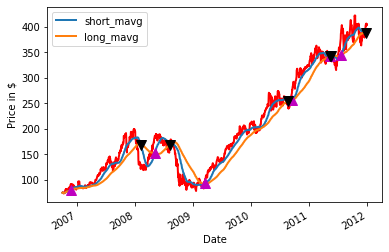

In [24]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

<h2>Backtesting the Algorithm</h2>

In [25]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj. Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj. Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj. Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio)

                   AAPL     holdings           cash          total   returns
Date                                                                        
2006-10-02     0.000000     0.000000  100000.000000  100000.000000       NaN
2006-10-03     0.000000     0.000000  100000.000000  100000.000000  0.000000
2006-10-04     0.000000     0.000000  100000.000000  100000.000000  0.000000
2006-10-05     0.000000     0.000000  100000.000000  100000.000000  0.000000
2006-10-06     0.000000     0.000000  100000.000000  100000.000000  0.000000
...                 ...          ...            ...            ...       ...
2011-12-23  5183.352647  5183.352647   97695.616584  102878.969231  0.000597
2011-12-27     0.000000     0.000000  102920.093691  102920.093691  0.000400
2011-12-28     0.000000     0.000000  102920.093691  102920.093691  0.000000
2011-12-29     0.000000     0.000000  102920.093691  102920.093691  0.000000
2011-12-30     0.000000     0.000000  102920.093691  102920.093691  0.000000

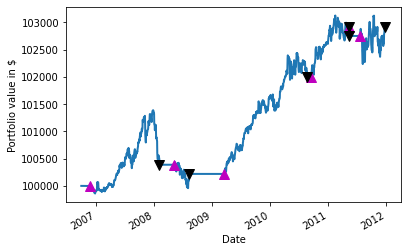

In [26]:
# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

<h2>Evaluating Momentum Based Algorithm</h2>

<p>Above, we backtested the momentum based algorithm we created by creating a virtual portfolio, adding 100,000 US dollars to it and then running it through about 5 years of trading using signals generated by the algorithm. This is what is known as the process of backtesting. We are taking an algorithm and testing it with data from the past to see how well it performs and to have an idea of how it can perform in the future. As we can see in the graph, the value of the portfolio increased by about approximately 3000 US dollars which is a pretty decent return for a basic trading algorithm. It seems there was a period of time between 2008 and 2009 where the trading algorithm was not able to make any money so perhaps we can check some metrics to see what could have been improved.</p>

<br>

<p>In terms of the momentum based trading strategy, it does have some strengths and some weaknesses. For strengths, momentum trading is great when it comes to trading on days that are part of a trend, for example if the market ist trending upward or downward, it works well. Momentum trading can also be used to identifty both medium and long momentum stocks which is a stock that will trend upward for a medium to long period of time. Lastly, momentum trading can be used to identify which stocks have the highest probability of being traded during a trending market. For weaknesses, momentum trading can generate multiple fake trading signals at a time which can be harmful to portfolio value. Momentum trading is also ineffective when the market is sideways. A sideways market is something that occurs when there are no distinct trends for a long period of time. This generally happens when supply and demand are equal. The last significant weakness is that it is usually difficult to generate a risk/reward ratio with momentum trading since trading on a trend tends to have low risk for a somewhat low reward. For an actual risk/reward ratio, more factors must be considered and usually this leads to event-based trading.</p>

In [61]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.7261238825870245


<p>The Sharpe Ratio tells us how risky our portfolio is. This type of risk is classified as how smart the investments the trading algorithm makes. Generally we want a value greater than 1 but for my first time testing a trading algorithm I'd say 0.726 is decent.</p>

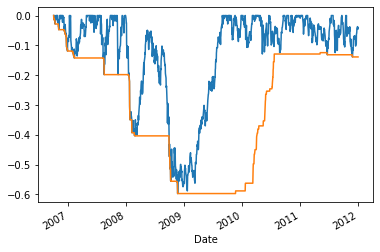

In [63]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day 
rolling_max = aapl['Adj. Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj. Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

<p>Maximum Drawdown is used to measure the largest single drop from peak to bottom in the value of a portfolio, so before a new peak is achieved. In other words, the score indicates the risk of a portfolio chosen based on a certain strategy. Maximum drawdown is an indicator of downside risk over a specified time period. In the graph above, the blue line represents the maximum drawdown of the stock over a 252 day window hence it becomes a rolling maximum drawdown. On the contrary, the orange line represents the rolling minimum daily drawdown which shows the largest single gain from bottom to peak in the value of a portfolio.</p>

In [65]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj. Close'][-1]) / aapl['Adj. Close'][1])) ** (365.0/days)) - 1

# Print the CAGR
print(cagr)

0.38238012707094704


<p>The Compound Annual Growth Rate provides you with a constant rate of return over the time period. In other words, the rate tells you what you really have at the end of your investment period.</p>